In [24]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
%matplotlib inline

### Pandas
- groupby
- filtering operation
- pivot/melt
- join/merge
- describe
- nunique, unique, value_counts
- set_index, reset_index,
- sort_values
- apply
- dt, str, plot, style
- resample

### yet to learn
- reindex, append, concat, iloc/loc

In [145]:
url = 'https://raw.githubusercontent.com/skathirmani/datasets/master/insurance.csv'
insurance = pd.read_csv(url)
insurance.shape

(1338, 7)

In [6]:
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
## Understanding KPIs

# story telling
# ml model
# optimize (sales, loss, productivity)

In [7]:
## Understand the patterns(variation) for expenses
## What influences my expenses
## information in data --> variance in the data

In [ ]:
### Descriptive statistics

In [8]:
insurance.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [9]:
# expected expenses -> mean(expenses)

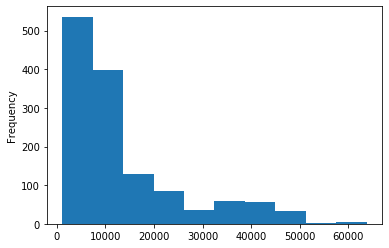

In [12]:
insurance['expenses'].plot.hist()

In [ ]:
## does age influences expenses
## numeric vs numeric
## correlation analysis

In [23]:
import scipy.stats as st
r = st.pearsonr(insurance['expenses'], insurance['age'])[0]
r

0.2990081922850827

In [20]:
r = st.pearsonr(insurance['age'], insurance['e'])[0]
r

0.04246899855884946

In [32]:
corr_matrix = insurance.corr()
corr_matrix

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


In [43]:
for i in range(len(corr_matrix.columns)):
    corr_matrix.iloc[i, i] = None
corr_matrix

,age,bmi,children,expenses
age,NaN,0.109341,0.042469,0.299008
bmi,0.109341,NaN,0.012645,0.198576
children,0.042469,0.012645,NaN,0.067998
expenses,0.299008,0.198576,0.067998,NaN


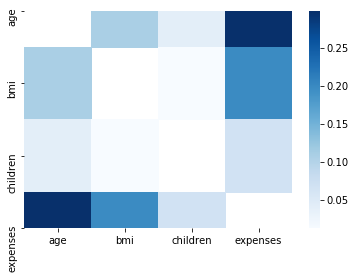

In [45]:
sns.heatmap(corr_matrix, cmap='Blues')

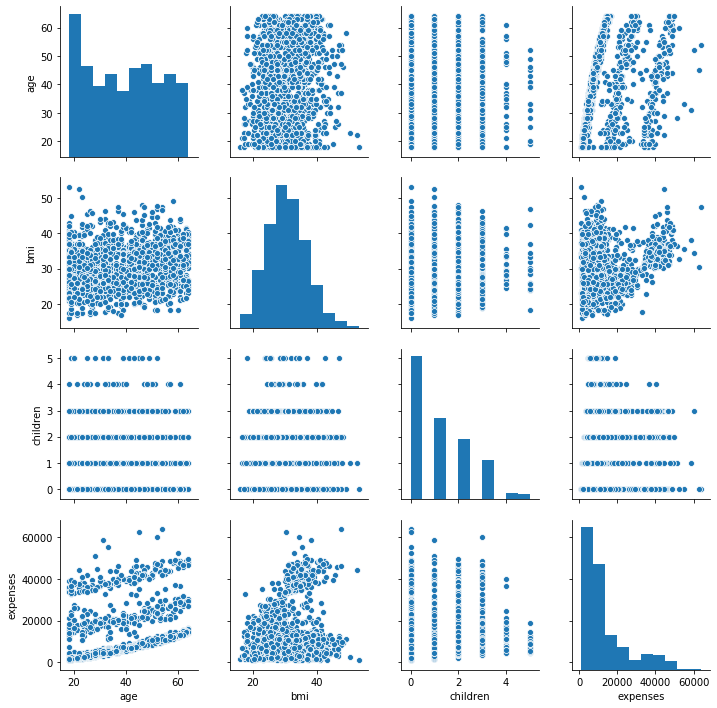

In [46]:
# pair plot
sns.pairplot(insurance)

In [57]:
insurance['is_southeast'] = insurance['region'].apply(lambda v: 'yes' if v=='southeast' else 'no')
insurance.head()

,age,sex,bmi,children,smoker,region,expenses,is_southeast
0,19,female,27.9,0,yes,southwest,16884.92,no
1,18,male,33.8,1,no,southeast,1725.55,yes
2,28,male,33.0,3,no,southeast,4449.46,yes
3,33,male,22.7,0,no,northwest,21984.47,no
4,32,male,28.9,0,no,northwest,3866.86,no


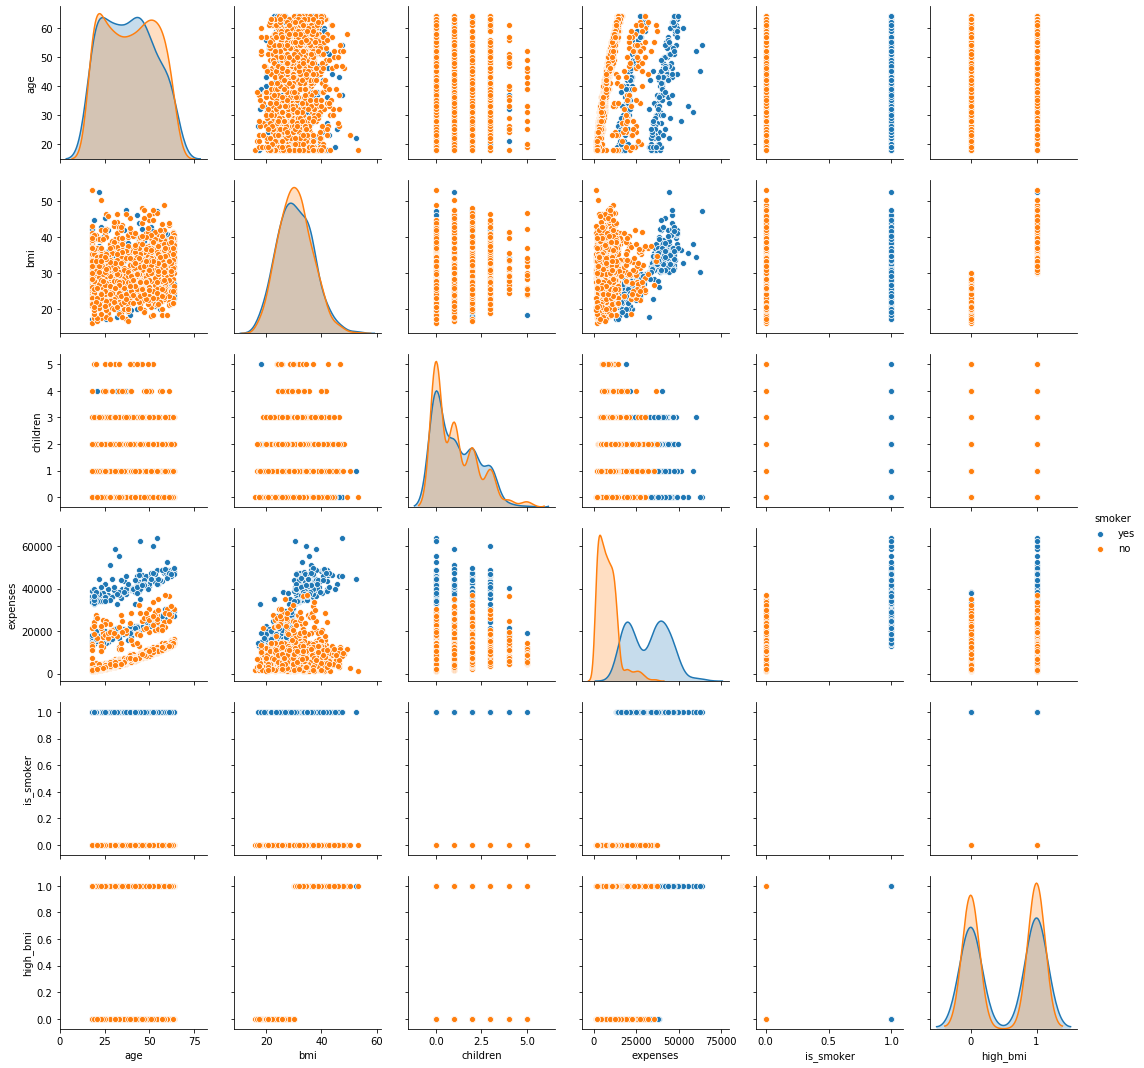

In [80]:
sns.pairplot(insurance, hue='smoker')

In [72]:
insurance['is_smoker'] = insurance['smoker'].replace({'yes': 1,
                                                          'no': 0})
corr_matrix = insurance.corr()
np.fill_diagonal(corr_matrix.values, None,)

In [76]:
corr_matrix

,age,bmi,children,expenses,is_smoker
age,NaN,0.109341,0.042469,0.299008,-0.025019
bmi,0.109341,NaN,0.012645,0.198576,0.003968
children,0.042469,0.012645,NaN,0.067998,0.007673
expenses,0.299008,0.198576,0.067998,NaN,0.787251
is_smoker,-0.025019,0.003968,0.007673,0.787251,NaN


In [78]:
insurance['high_bmi'] = insurance['bmi'].apply(lambda v: 1 if v>30 else 0)
corr_matrix = insurance.corr()
np.fill_diagonal(corr_matrix.values, None,)

In [82]:
insurance['high_bmi_smoker'] = insurance['is_smoker'] * insurance['high_bmi']

In [84]:
insurance.corr()

,age,bmi,children,expenses,is_smoker,high_bmi,high_bmi_smoker
age,1.000000,0.109341,0.042469,0.299008,-0.025019,0.086981,0.000929
bmi,0.109341,1.000000,0.012645,0.198576,0.003968,0.800303,0.279536
children,0.042469,0.012645,1.000000,0.067998,0.007673,0.017069,0.004872
expenses,0.299008,0.198576,0.067998,1.000000,0.787251,0.199744,0.813875
is_smoker,-0.025019,0.003968,0.007673,0.787251,1.000000,0.000227,0.681679
high_bmi,0.086981,0.800303,0.017069,0.199744,0.000227,1.000000,0.331243
high_bmi_smoker,0.000929,0.279536,0.004872,0.813875,0.681679,0.331243,1.000000


In [49]:
sns.scatterplot(insurance['chi'], insurance['expenses'])

In [85]:
### Exercises

In [86]:
employees = pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/HR%20Analytics.csv')

In [97]:
#employees.dtypes[employees.dtypes==object].index

In [100]:
#employees.describe().columns.tolist()

In [103]:
#employees._get_numeric_data().columns.tolist()

In [113]:
employees['EmployeeCount'].nunique()

1

In [126]:
# identify columns which have high correlation with monthlyincome
cor = employees.corr()['MonthlyIncome'].abs().sort_values(ascending=False).drop('MonthlyIncome')

In [129]:
cor[cor>0.6]

JobLevel             0.950300
TotalWorkingYears    0.772893
Name: MonthlyIncome, dtype: float64

In [ ]:
## Can you create a function
## identify pairs of columns which are highly correlated

In [ ]:
# age, monthlyincome, monthlyincome & age is correlated

In [208]:
#def get_correlated_metrics(df):
#    results = [('col1', 'col2', corr_val),
#               ('col2', 'col4', corr_val)]
#    return results

In [193]:
def get_correlated_metrics(df, thresh=0.6):
    corr_matrix = df.corr()
    corr_matrix = pd.DataFrame(np.tril(corr_matrix, -1),
                columns=corr_matrix.columns,
                index=corr_matrix.index)
    res = []
    thresh = 0.6
    for col in corr_matrix.columns:
            corr_col_abs = corr_matrix[col].abs()
            corr_col_abs = corr_col_abs[corr_col_abs >= thresh]
            temp = pd.DataFrame({'col2': corr_col_abs.index,
                                 'val': corr_col_abs.values})
            temp['col1'] = col
            if len(temp):
                res.extend(temp.values.tolist())
    res = pd.DataFrame(res, columns=['col1', 'corr', 'col2'])
    return res

In [239]:
df = insurance.copy()

corr_matrix = df.corr()
df_corr = pd.DataFrame(np.tril(corr_matrix, -1),
                      columns=corr_matrix.columns,
                      index=corr_matrix.index)
thresh = 0.2
res = []

for col in df_corr.columns:
    col_vals = df_corr[col].abs()
    col_vals_abs = col_vals[col_vals >= thresh]
    if len(col_vals_abs)>0:
        df = pd.DataFrame({
            'col1': col,
            'col2': col_vals.index,
            'corr': col_vals.values
        })
        res.extend(df.values)
df_res = pd.DataFrame(res, columns=['col1', 'col2', 'corr'])
df_res

,col1,col2,corr
0,age,age,0.000000
1,age,bmi,0.109341
2,age,children,0.042469
3,age,expenses,0.299008


In [256]:
df = employees.copy()


def get_correlated_metrics(df, thresh=0.6):
    corr_matrix = df.corr()
    thresh=0.6
    df_corr = pd.DataFrame(np.tril(corr_matrix, -1),
                          columns=corr_matrix.columns,
                          index=corr_matrix.index)
    df_corr_melted = df_corr.reset_index().melt(id_vars='index')
    df_corr_melted = df_corr_melted[df_corr_melted['value']>= thresh]
    df_corr_melted = df_corr_melted.rename(columns={'index': 'col1',
                                                    'variable': 'col2',
                                                    'value': 'corr'})
    df_corr_melted = df_corr_melted.reset_index(drop=True)
    return df_corr_melted

In [257]:
get_correlated_metrics(employees, thresh=0.7)

,col1,col2,corr
0,TotalWorkingYears,Age,0.680381
1,MonthlyIncome,JobLevel,0.950300
2,TotalWorkingYears,JobLevel,0.782208
3,TotalWorkingYears,MonthlyIncome,0.772893
4,PerformanceRating,PercentSalaryHike,0.773550
5,YearsAtCompany,TotalWorkingYears,0.628133
6,YearsInCurrentRole,YearsAtCompany,0.758754
7,YearsSinceLastPromotion,YearsAtCompany,0.618409
8,YearsWithCurrManager,YearsAtCompany,0.769212
9,YearsWithCurrManager,YearsInCurrentRole,0.714365
